<a href="https://colab.research.google.com/github/Gabrielvss/labeling_challenge/blob/main/desafio_tecnico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio do Labeling
Este desafio tem como objetivo analisar as capacidades analíticas em problemas
relacionados a meta informações em conjuntos de dados para auxiliar na construção de modelos de Machine Learning.


In [1]:
import requests
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
#im = Image.open(urllib2.urlopen(url))

In [2]:
data = pd.read_csv('/content/drive/MyDrive/JOBS/B2W/results-20210324-082009.csv')

In [3]:
data

,B2W_ID,URL,IMAGE,TITULO
0,2795393839,https://americanas.com.br/produto/2795393839,https://images-americanas.b2w.io/produtos/01/0...,Boneco Thanos Vingadores Ultimato 30cm Origina...
1,34921490,https://americanas.com.br/produto/34921490,https://images-americanas.b2w.io/produtos/01/0...,Relogio Feminino Digital Dourado Fundo Preto C...
2,1499532822,https://americanas.com.br/produto/1499532822,https://images-americanas.b2w.io/produtos/01/0...,Avião Hot Wheels - HW X2 Laranja - Mattel
3,2887300919,https://americanas.com.br/produto/2887300919,https://images-americanas.b2w.io/produtos/01/0...,Massa De Eva Para Artesanato Marrom 60g
4,1740563790,https://americanas.com.br/produto/1740563790,https://images-americanas.b2w.io/produtos/01/0...,Patinete Masculino Urbano Scooter Infantil 3 R...
5,38760348,https://americanas.com.br/produto/38760348,https://images-americanas.b2w.io/produtos/01/0...,Relógio NIXON A950 - 2219-00
6,2902220053,https://americanas.com.br/produto/2902220053,https://images-americanas.b2w.io/produtos/01/0...,Relógio Digital Atlantis Shock Cronômetro 7330...
7,2748580025,https://americanas.com.br/produto/2748580025,https://images-americanas.b2w.io/produtos/01/0...,Despertador Azul Metalico Herweg Analogico Ori...
8,1877976309,https://americanas.com.br/produto/1877976309,https://images-americanas.b2w.io/produtos/01/0...,Carrinho Roda Livre 13cm Carros Toyng - Fabulo...
9,1608600936,https://americanas.com.br/produto/1608600936,https://images-americanas.b2w.io/produtos/01/0...,Technos Skydiver T205JL/4P


A base de dados consiste em amostras do catalogo de produtos(itens) do site das lojas americanas, cada linha representa um item com as seguintes características separadas nas colunas:

- B2W_ID: código identificador unico de cada
- URL: URL da página do produto no site
- IMAGE: URL com uma imagem do produto
- TITULO: titulo ou nome do produto  

# 1. Classificação de Produtos
Como você categoriza cada um desses produtos visando identificar o seu WIT (What
is this?).

 

Os dados fornecem uma lista de itens porém como saber o que é cada produto ?
Em Machine Learnig e Ciência de dados esse é um problema de classificação, ou seja, os dados não estão rotulados em suas classes (labels) correspondentes.

## Análise exploratoria dos dados
Para entender melhor quais são os produtos da base será feita uma análise exploratoria dos dados a fim de extrair características (features) que podem auxiliar o modelos a encontrar essas classes. 
 


### Analisando as imagens

In [4]:
#função que retrona a imagem a aprtir da url
def get_image(url):
  response = requests.get(url)
  image = np.asarray(bytearray(response.content), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  return image

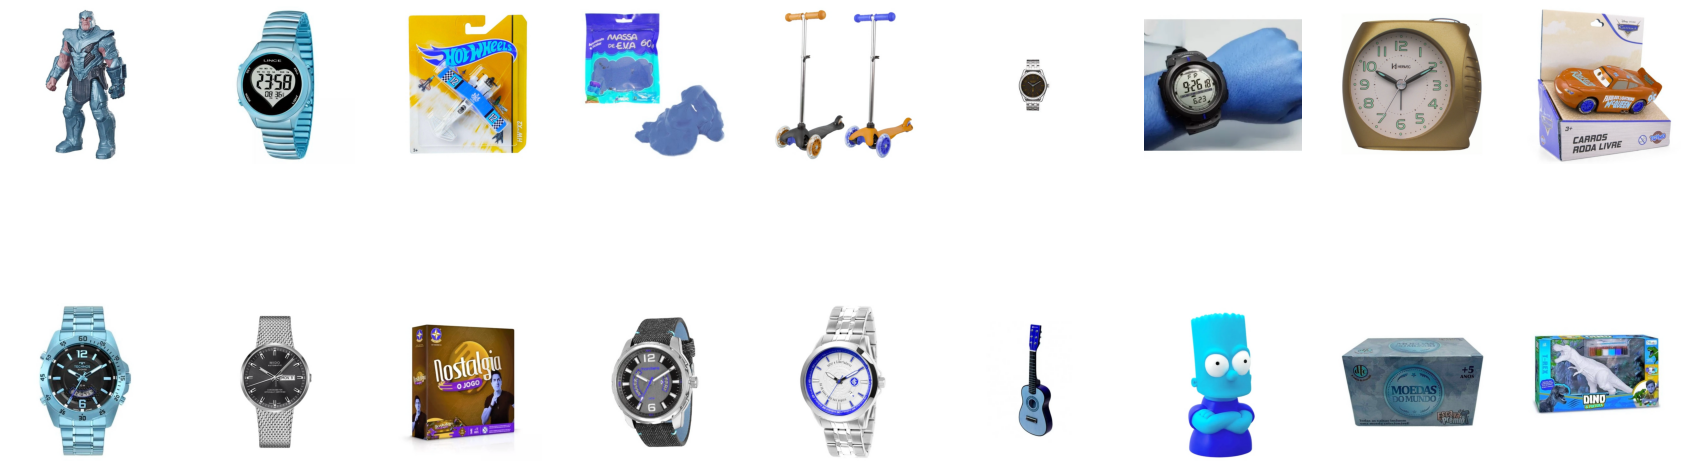

In [5]:
ulrs_images = data['IMAGE']
def plot_images(ulrs_images):
  fig,ax = plt.subplots(2, int(len(ulrs_images)/2), figsize=(30, 10))
  column_idx = 0
  for image_id,image_url in enumerate(ulrs_images):
    image = get_image(image_url)
    
    if image_id < (len(ulrs_images)/2):
      ax[0,column_idx].imshow(image)
      ax[0,column_idx].axis('off')
    else: 
      ax[1,column_idx].imshow(image)
      ax[1,column_idx].axis('off')

  
    column_idx += 1
    column_idx = 0 if  column_idx == (len(ulrs_images)/2) else column_idx

plot_images(ulrs_images)



É possível perceber duas grandes classes: relogios e brinquedos cada uma com sua variabilidade de características que representam seus atributos ou categorias.



### Analisando o Titulo

In [6]:
data['TITULO']

0     Boneco Thanos Vingadores Ultimato 30cm Origina...
1     Relogio Feminino Digital Dourado Fundo Preto C...
2             Avião Hot Wheels - HW X2 Laranja - Mattel
3               Massa De Eva Para Artesanato Marrom 60g
4     Patinete Masculino Urbano Scooter Infantil 3 R...
5                          Relógio NIXON A950 - 2219-00
6     Relógio Digital Atlantis Shock Cronômetro 7330...
7     Despertador Azul Metalico Herweg Analogico Ori...
8     Carrinho Roda Livre 13cm Carros Toyng - Fabulo...
9                            Technos Skydiver T205JL/4P
10          Relógio Mido Commander - M031.631.11.061.00
11                             Jogo Nostalgia - Estrela
12    Relógio masculino mondaine pulseira jeans anal...
13        Relógio Internacional Masculino INT2115AA/K3K
14                Mini Violão Brinquedo Para Iniciantes
15    Simpsons The Bart Figure Cofre Busto Oficial L...
16          Jogo de Tabuleiro Pinguim Numa Fria Estrela
17        Dinossauro Tiranossauro Rex 49 Cm Para

O título traz várias informações sobre cada item ou seja as caracteristicas do produto relogio e as caracteristicas dos produtos brinquedos

Como a base de dados fornece as imagens isso facilita bastante o reconhecimento das classes, o titulo fornece vários atributos porém possui maior variabilidade o que dificulta a analise da padrões. Por exemplo o seguinte item: 

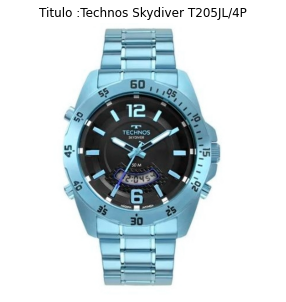

In [7]:
def plot_one_image(url,title):
  fig = plt.figure(figsize=(5,5))
  plt.title(title)
  plt.imshow(url)
  plt.axis('off');

plot_one_image(get_image(data['IMAGE'][9]),'Titulo :{}'.format(data['TITULO'][9]))

Diferente da maioria dos exemplos de relógio da bases, esse não possui "Relógio" no titulo, ou seja, quem não conece essa marca não seria capaz de identificar so pelo titulo que este item é um relógio, por esse motivo seram utilizada as imagens para classificar os dados.

In [8]:
labels = ['B','R','B','B','B','R','R','R','B','R','R','B','R','R','B','B','B','B']

B -> Brinquedo

R -> Relógio

In [9]:
data['CLASSES'] = labels

In [10]:
data

,B2W_ID,URL,IMAGE,TITULO,CLASSES
0,2795393839,https://americanas.com.br/produto/2795393839,https://images-americanas.b2w.io/produtos/01/0...,Boneco Thanos Vingadores Ultimato 30cm Origina...,B
1,34921490,https://americanas.com.br/produto/34921490,https://images-americanas.b2w.io/produtos/01/0...,Relogio Feminino Digital Dourado Fundo Preto C...,R
2,1499532822,https://americanas.com.br/produto/1499532822,https://images-americanas.b2w.io/produtos/01/0...,Avião Hot Wheels - HW X2 Laranja - Mattel,B
3,2887300919,https://americanas.com.br/produto/2887300919,https://images-americanas.b2w.io/produtos/01/0...,Massa De Eva Para Artesanato Marrom 60g,B
4,1740563790,https://americanas.com.br/produto/1740563790,https://images-americanas.b2w.io/produtos/01/0...,Patinete Masculino Urbano Scooter Infantil 3 R...,B
5,38760348,https://americanas.com.br/produto/38760348,https://images-americanas.b2w.io/produtos/01/0...,Relógio NIXON A950 - 2219-00,R
6,2902220053,https://americanas.com.br/produto/2902220053,https://images-americanas.b2w.io/produtos/01/0...,Relógio Digital Atlantis Shock Cronômetro 7330...,R
7,2748580025,https://americanas.com.br/produto/2748580025,https://images-americanas.b2w.io/produtos/01/0...,Despertador Azul Metalico Herweg Analogico Ori...,R
8,1877976309,https://americanas.com.br/produto/1877976309,https://images-americanas.b2w.io/produtos/01/0...,Carrinho Roda Livre 13cm Carros Toyng - Fabulo...,B
9,1608600936,https://americanas.com.br/produto/1608600936,https://images-americanas.b2w.io/produtos/01/0...,Technos Skydiver T205JL/4P,R


# 2. Identificação de Atributos
observe os produtos enviados no conjunto de dados e Identifique quais são os
atributos que identificam as características de cada um desses produtos e faça uma
proposta de quais atributos compõem a sua ficha técnica.

Com a classificação dos produtos é possível encontrar os atributos de cada um, ou seja, a partir da identificação da classe do produto é possível extrai características qeu descrevem cada item.

## Relógios

In [16]:
df_relogios = data[data['CLASSES']=='R'].iloc[:,[3,4]]
df_relogios

,TITULO,CLASSES
1,Relogio Feminino Digital Dourado Fundo Preto C...,R
5,Relógio NIXON A950 - 2219-00,R
6,Relógio Digital Atlantis Shock Cronômetro 7330...,R
7,Despertador Azul Metalico Herweg Analogico Ori...,R
9,Technos Skydiver T205JL/4P,R
10,Relógio Mido Commander - M031.631.11.061.00,R
12,Relógio masculino mondaine pulseira jeans anal...,R
13,Relógio Internacional Masculino INT2115AA/K3K,R


In [18]:
#salvando como planilha exel
df_relogios.to_excel('/content/drive/MyDrive/JOBS/B2W/classe_relogios.xlsx')

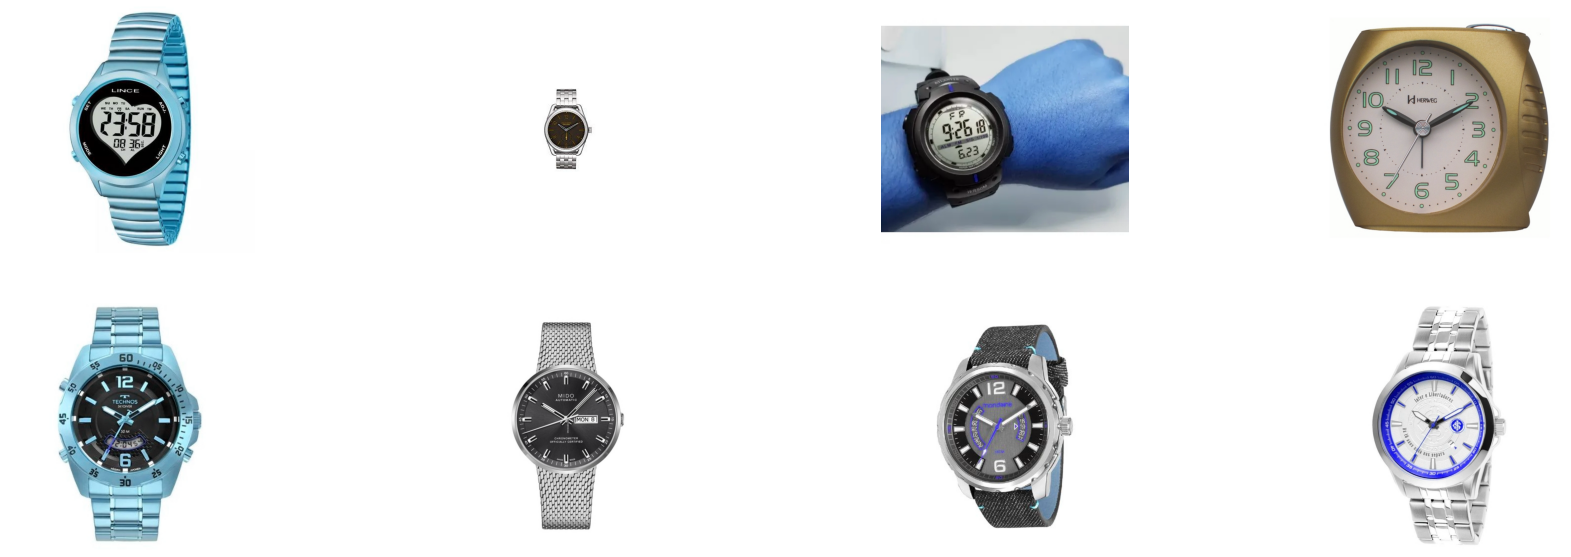

In [12]:
plot_images(data[data['CLASSES']=='R']['IMAGE'])

Como é possível notar os relógios possuem duas grandes subclasses, categorias ou atributos, podem ser relógios de pulso ou de mesa, ou seja o tipo/classe do relógio. Analisando o título alguns exemplos possuem o público alvo: feminino ou masculino. Ainda no título é possivel encontrar a marca e o modelo.

Em resumo temos os seguintes atributos:
- tipo/classe: pulso ou de mesa/despertadores
- publico_alvo: Masculino ou Feminino
- marca
- modelo

### Analisando os atributos

- tipo/classe: pulso ou de mesa/despertadores

Observando a as imagens existe apenas um exemplar na base de um relógio de mesa/despertador. 

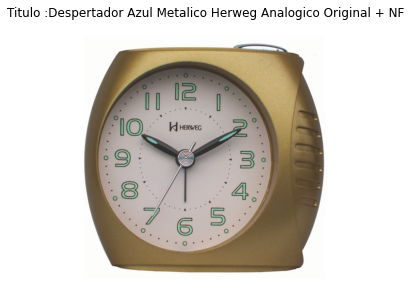

In [13]:
plot_one_image(get_image(data['IMAGE'][7]),'Titulo :{}'.format(data['TITULO'][7]))

Analisando este item é possível observar que o título identifica sua calsse/tipo, neste caso despertador, sendo este exemplo o unico que faz isso o que leva a crer que todos os outros exemplos podem ser classificados como de pulso, levantando a hipotese que esse atributo poderia ser classificado somente pelo título. 

Para essa base de dados que é uma pequena amostra de todo o catálogo da a Americanas isso é verdade, mas será que essa afirmação pode ser generalizada para todo o resto? 

Será feita a análise das urls disponíveis de cada produto e o departamento de relógio da Americanas.

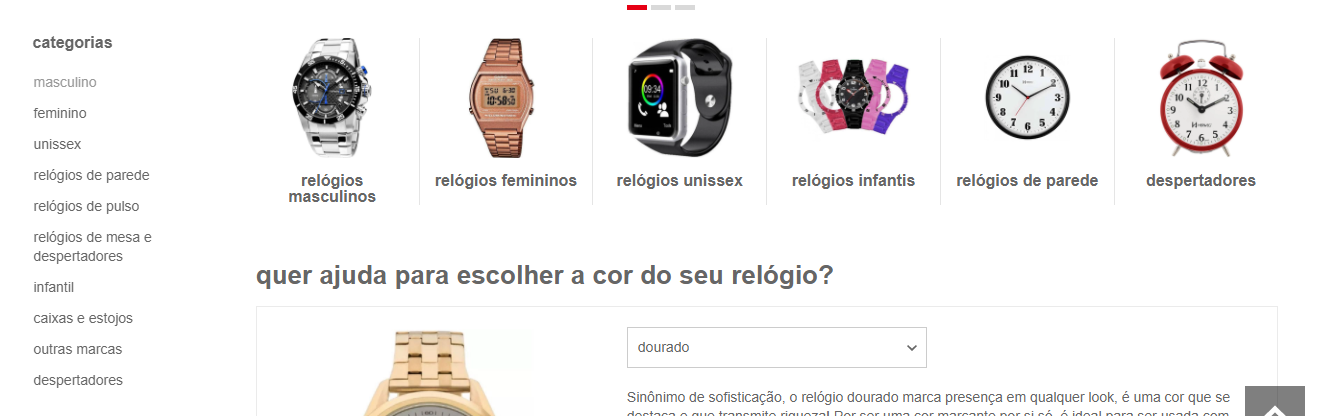

A partir da página do departamento de relógios é possível notar que o atributo classe/tipo possue mais valores possíveis que seriam "de parede", "caixas e estojos", outro fato interessante é que a categoria "despertadores" possui um campo exclusivo e junto a "relógio de mesa e despertadores". No atributo publico_alvo acontece o mesmo fenômeno com outros valores possíveis como infantil e unissex. 

O atributo publico_alvo pode ser divídido em:  

- público_alvo:
  -  genêro: masculino/feminino
  -  publico: infantil/adulto

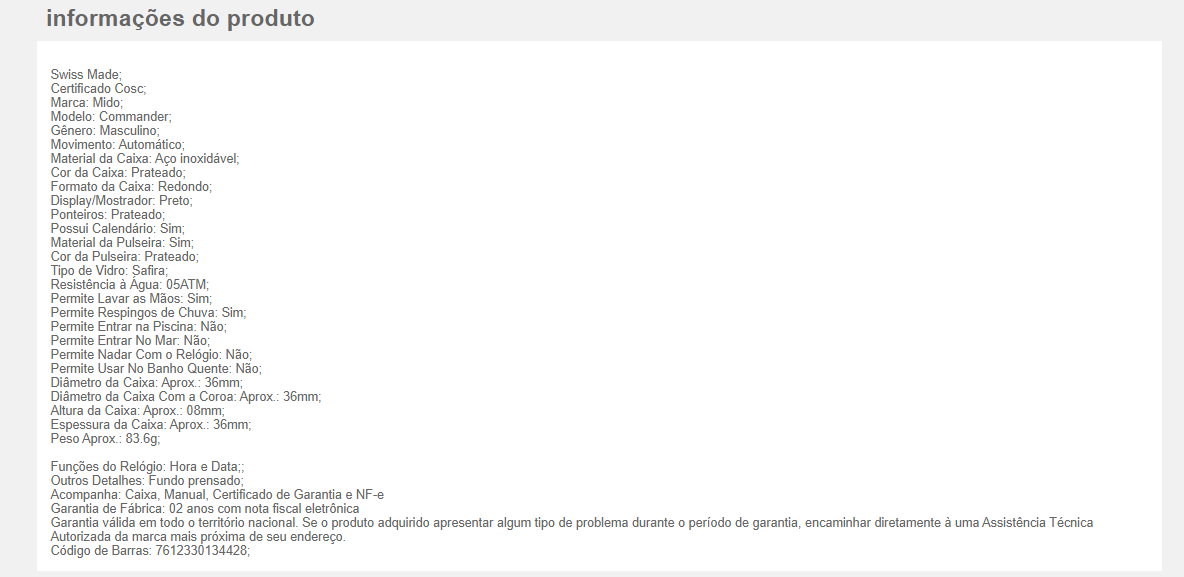
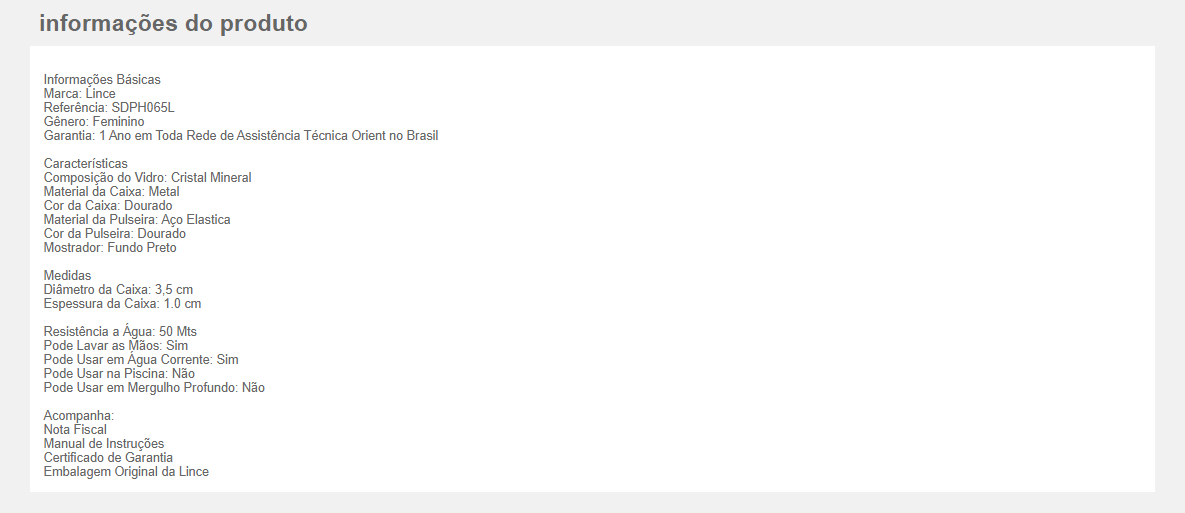

Essas são imagens das descrições de alguns do itens da base dados, essas informações foram tiradas da página do produto que é fornecida. Como é possível notar existem muitos outros possíveis atributos para os relógios porém, apenas com as informações fornecidas no Datasets nem todas são passíveis de 
identificação. 

Portanto os atributos para a classe relógio serão:

- tipo/classe: pulso ou de mesa/despertadores
- genêro: Masculino ou Feminino
- publico: adulto/infantil
- marca
- modelo


## Brinquedos

In [19]:
df_brinquedos = data[data['CLASSES']=='B'].iloc[:,[3,4]]
df_brinquedos

,TITULO,CLASSES
0,Boneco Thanos Vingadores Ultimato 30cm Origina...,B
2,Avião Hot Wheels - HW X2 Laranja - Mattel,B
3,Massa De Eva Para Artesanato Marrom 60g,B
4,Patinete Masculino Urbano Scooter Infantil 3 R...,B
8,Carrinho Roda Livre 13cm Carros Toyng - Fabulo...,B
11,Jogo Nostalgia - Estrela,B
14,Mini Violão Brinquedo Para Iniciantes,B
15,Simpsons The Bart Figure Cofre Busto Oficial L...,B
16,Jogo de Tabuleiro Pinguim Numa Fria Estrela,B
17,Dinossauro Tiranossauro Rex 49 Cm Para Pintar,B


In [20]:
df_brinquedos.to_excel('/content/drive/MyDrive/JOBS/B2W/produtos_relogio.xlsx')

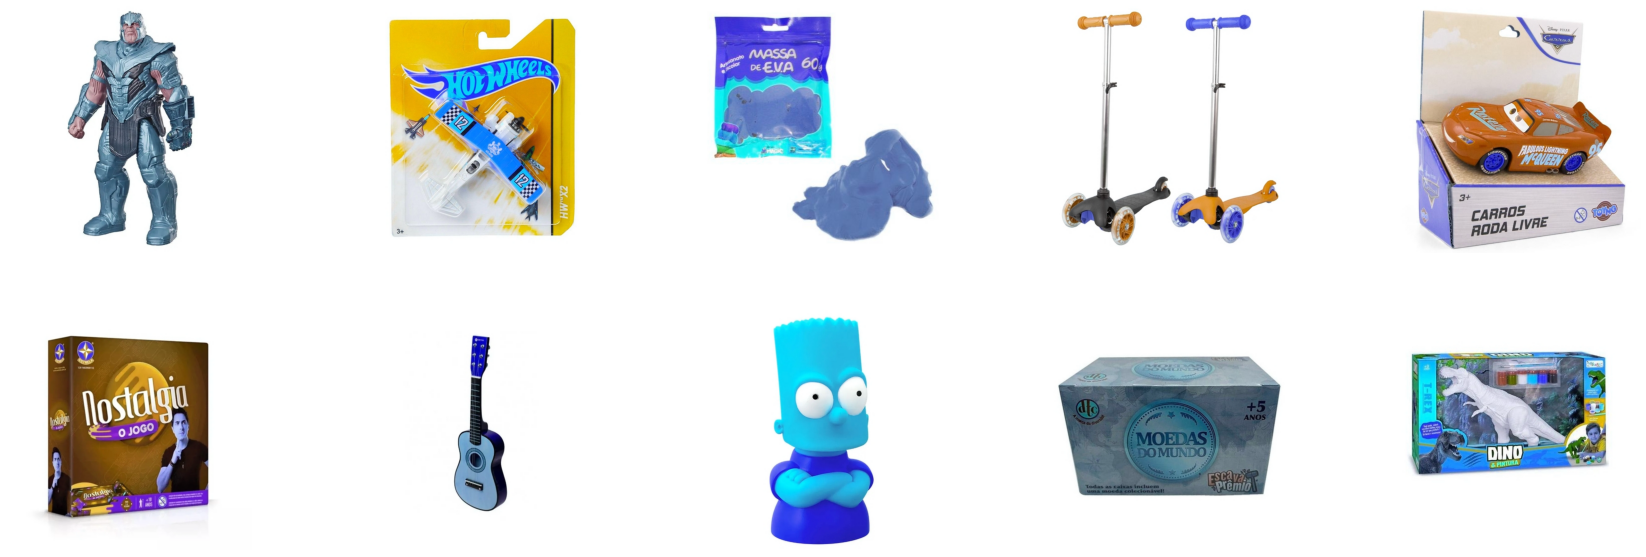

In [15]:
plot_images(data[data['CLASSES']=='B']['IMAGE'])

Apesar de apresentar muito mais variabilidade do que a classe relógio a identificação dos atributos se torna bem mais complexa. com o axilio do título é possível identificar um primeiro atributo a classe/categoria/tipo que pode ser bonecos, jogos ou veículos entre outros e o atributo marca. Será feita uma analise do site da americanas similar a feita para os relógios.

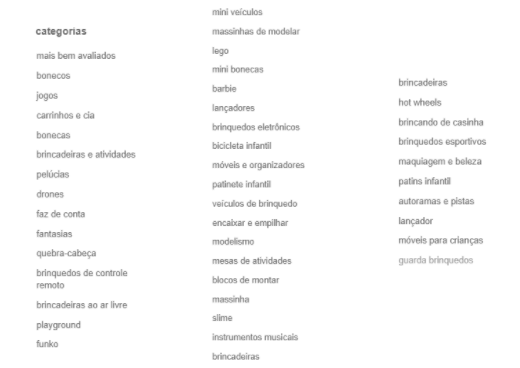

Essas são todas as categorias do departamento de brinquedos 

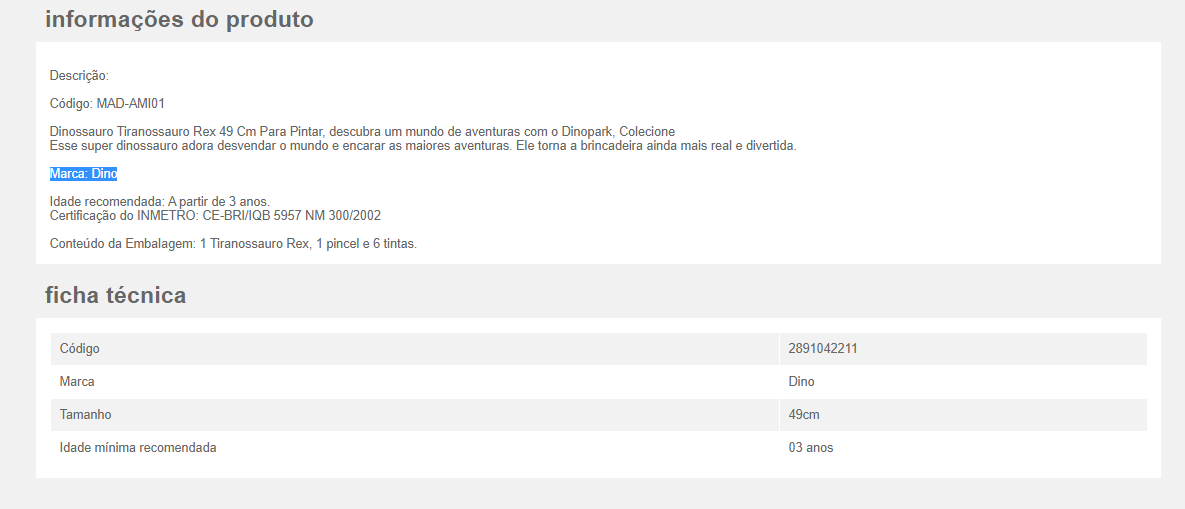

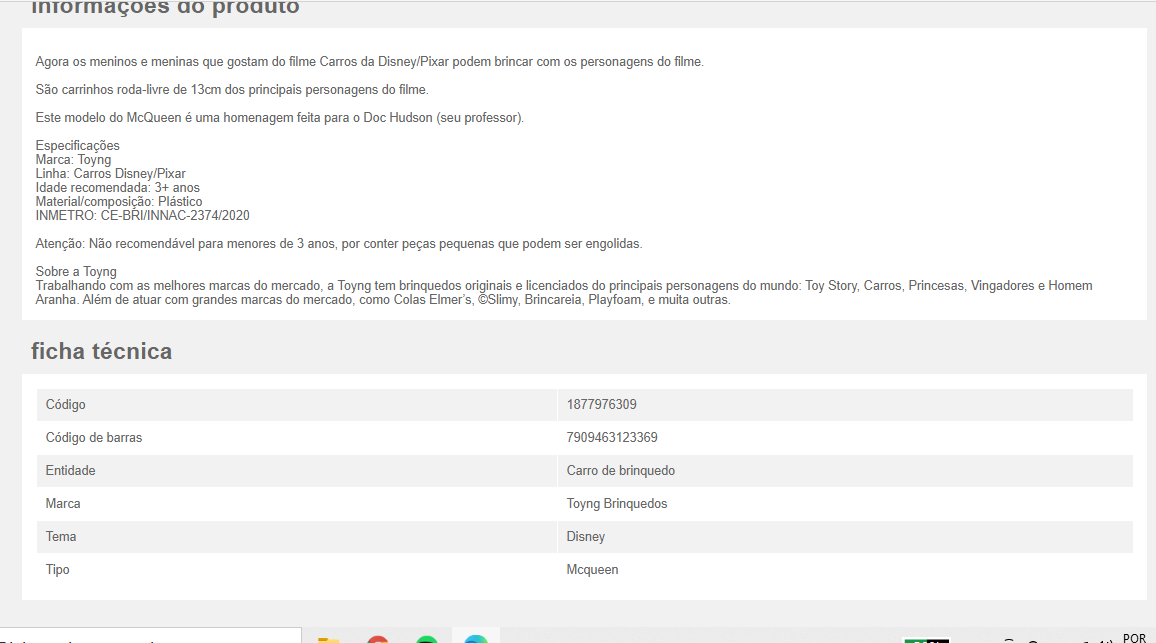



Agulgumas descrições dos brinquedos do Dataset extraidas das páginas como é possível há também um atributo de nome/descrição do brinquedo que no site é chamado por modelo, tipo ou até mesmo descrição. Outro fato importante é que depedendo da categoria do briquedo o título pode trazer mais informações, por exemplo os brinquedos do tipo bones trazem uma informação de tamanho. 

Sendo assim os atributos da classe brinquedo serão:
- categoria
- marca
- nome/descrição:
- tamanho: